In [ ]:
import pickle
import numpy
from embed_articles import embed_articles
from cosine_similarity import cosine_sim
import matplotlib.pyplot as plt

input_filename = 'newsdata_p1.json'
output_filename = 'embedded_articles.pkl'
embedding_variables = ['description', 'title']
run_embedding = True   # True if first time running
run_cossim = True      # True if first time running

if run_embedding:
    # Embedding all articles
    print('Running embedding')
    embedded_articles, embedding_length, num_articles = embed_articles(input_filename=input_filename, 
                                                                    output_filename=output_filename, 
                                                                    embedding_variables=embedding_variables) 
    with open(output_filename, 'wb') as f:
        pickle.dump(embedded_articles, f)
    print("Size of each embedding:", embedding_length)
    print("Amount of articles reviewed:", num_articles)
    print("Amount of articles embedded:", len(embedded_articles))
    print("Finished running embedding")
else:
    with open(output_filename, 'rb') as f:
        embedded_articles = pickle.load(f)

if run_cossim:
    # Calculating cosine similarity on titles and descriptions
    print("Running cosine similarity")
    emb_titles = []
    emb_desc = []
    for key in embedded_articles.keys():
        emb_titles.append(embedded_articles[key]['embedded_title'])
        emb_desc.append(embedded_articles[key]['embedded_description'])
    cossim_titles = cosine_sim(input_data=emb_titles)
    cossim_desc = cosine_sim(input_data=emb_desc)

    with open('cosine_similarities_titles.pkl', 'wb') as f:
        pickle.dump(cossim_titles, f)
    with open('cosine_similarities_descriptions.pkl', 'wb') as f:
        pickle.dump(cossim_desc, f)
        
    print("Finished running cosine similarity")
else:
    with open('cosine_similarities_titles.pkl', 'rb') as f:
        cossim_titles = pickle.load(f)
    with open('cosine_similarities_descriptions.pkl', 'rb') as f:
        cossim_desc = pickle.load(f)


Running embedding


100%|██████████| 677/677 [00:18<00:00, 36.81it/s]


Number of articles not valid for embedding: 0
Size of each embedding: 384
Amount of articles reviewed: 676
Amount of articles embedded: 676
Finished running embedding
Running cosine similarity
Finished running cosine similarity


In [3]:
num_rows = len(embedded_articles.keys())
num_variables = len(embedded_articles['2c5f9d3455e1dc5ca96c14d39bd2d61d'].keys())

print(f"Number of rows: {num_rows}\nNumber of variables: {num_variables}")

Number of rows: 676
Number of variables: 10


In [22]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(list(embedded_articles.keys()))

thres = 0.3
for i in range(len(cossim_desc)-1):
    id_i = list(embedded_articles.keys())[i]
    for j in range(i+1, len(cossim_desc)):
        id_j = list(embedded_articles.keys())[j]
        if cossim_desc[i][j] >= thres:
            G.add_edge(id_i, id_j)

nx.set_node_attributes(G, embedded_articles)
H = G.subgraph(max(nx.connected_components(G), key=len))
print("Number of nodes in largest connected component:", H.number_of_nodes())
print("Number of edges in largest connected component:", H.number_of_edges())
print("Node attributes are:", list(list(H.nodes(data=True))[0][1].keys()))

Number of nodes in largest connected component: 623
Number of edges in largest connected component: 3317
Node attributes are: ['link', 'title', 'description', 'country', 'category', 'pubDate', 'source_id', 'source_name', 'embedded_description', 'embedded_title']


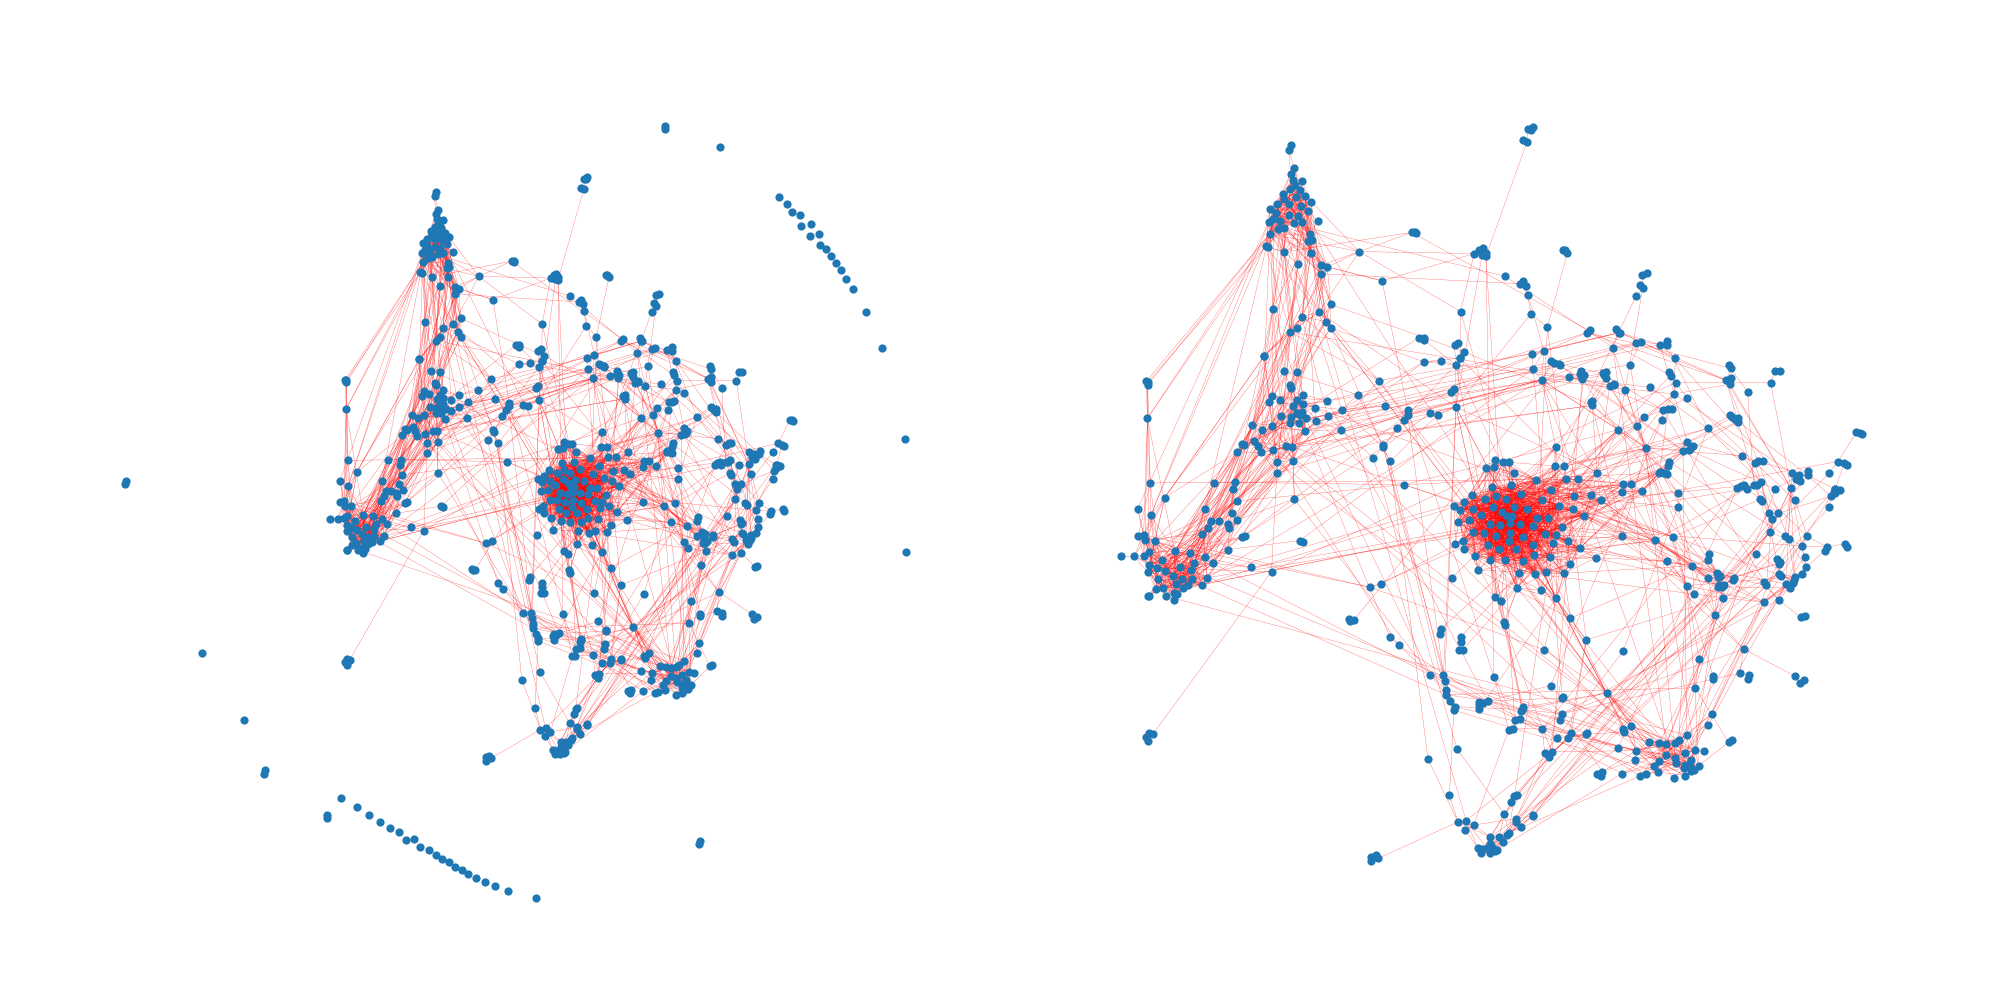

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))

pos = nx.forceatlas2_layout(G, max_iter=1000, scaling_ratio=2, gravity=2, linlog=True, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=35, linewidths=0, ax=ax[0])
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.8, edge_color="red", ax=ax[0])
ax[0].margins(0.1)
ax[0].set_axis_off()

pos2 = nx.forceatlas2_layout(H, max_iter=1000, scaling_ratio=2, gravity=2, linlog=True, seed=42)
nx.draw_networkx_nodes(H, pos, node_size=35, linewidths=0, ax=ax[1])
nx.draw_networkx_edges(H, pos, width=0.2, alpha=0.8, edge_color="red", ax=ax[1])
ax[1].margins(0.1)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

print(f"{round(len(H.nodes())/len(G.nodes())*100,2)}% of the nodes are in the largest connected component.")

(array([133., 103.,  80.,  58.,  45.,  41.,  16.,  14.,  24.,  19.,  11.,
         13.,   9.,   5.,   5.,   4.,   3.,   6.,   3.,   3.,   3.,   2.,
          4.,   4.,   2.,   4.,   6.,   1.,   0.,   2.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
        27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
        53., 55., 57., 59., 61.]),
 <BarContainer object of 30 artists>)

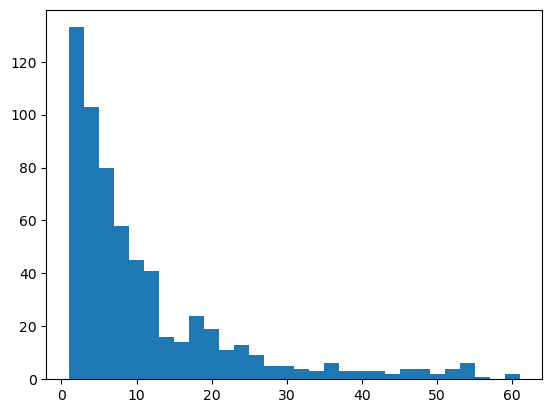

In [10]:
import matplotlib.pyplot as plt

degrees = [H.degree(n) for n in H.nodes()]

plt.hist(degrees, bins=30)